In [27]:
import mlflow
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")

experiment_name = "cnn_flowers_capacity_v2"
experiment = mlflow.get_experiment_by_name(experiment_name)

assert experiment is not None, "Experiment not found"

experiment


<Experiment: artifact_location='mlflow-artifacts:/3', creation_time=1768326652353, experiment_id='3', last_update_time=1768326652353, lifecycle_stage='active', name='cnn_flowers_capacity_v2', tags={'mlflow.experimentKind': 'custom_model_development'}>

In [29]:
runs = mlflow.search_runs(
    experiment_ids=[experiment.experiment_id],
    output_format="pandas",
)

runs.head()


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.metric/Accuracy,metrics.learning_rate,metrics.Loss/train,metrics.Loss/test,...,tags.epochs,tags.mlflow.runName,tags.mlflow.user,tags.units1,tags.batch_size,tags.mlflow.source.type,tags.mlflow.source.name,tags.filters,tags.lr,tags.mlflow.source.git.commit
0,4d746fd47534450ba7bba62929c40a93,3,FINISHED,mlflow-artifacts:/3/4d746fd47534450ba7bba62929...,2026-01-13 18:21:56.778000+00:00,2026-01-13 18:23:51.402000+00:00,0.43500,0.001,1.204283,1.199896,...,5,popular-asp-103,denni,512,32,LOCAL,4. Hypertuning RAY/hypertuning.py,32,0.001,d843fc4564a8945144c821c51df858b94cea6171
1,f80347341cea46509b3d631f434ee5cb,3,FINISHED,mlflow-artifacts:/3/f80347341cea46509b3d631f43...,2026-01-13 18:19:56.373000+00:00,2026-01-13 18:21:47.496000+00:00,0.45125,0.001,1.305737,1.234224,...,5,brawny-colt-916,denni,512,32,LOCAL,4. Hypertuning RAY/hypertuning.py,32,0.001,d843fc4564a8945144c821c51df858b94cea6171
2,960bb81a88144b1a956c1cc6ffd5ef07,3,FINISHED,mlflow-artifacts:/3/960bb81a88144b1a956c1cc6ff...,2026-01-13 18:17:54.569000+00:00,2026-01-13 18:19:47.405000+00:00,0.38625,0.001,1.458668,1.432223,...,5,gentle-snipe-472,denni,512,32,LOCAL,4. Hypertuning RAY/hypertuning.py,32,0.001,d843fc4564a8945144c821c51df858b94cea6171
3,7c09ece978a141ad82eda8484ae01a2b,3,FINISHED,mlflow-artifacts:/3/7c09ece978a141ad82eda8484a...,2026-01-13 18:15:36.656000+00:00,2026-01-13 18:17:42.589000+00:00,0.44625,0.001,1.334163,1.264594,...,5,overjoyed-asp-812,denni,256,32,LOCAL,4. Hypertuning RAY/hypertuning.py,32,0.001,d843fc4564a8945144c821c51df858b94cea6171
4,1a1a3b6ed65f4691998a771ae21a443a,3,FINISHED,mlflow-artifacts:/3/1a1a3b6ed65f4691998a771ae2...,2026-01-13 18:13:24.335000+00:00,2026-01-13 18:15:24.771000+00:00,0.40625,0.001,1.433153,1.345314,...,5,likeable-panda-94,denni,256,32,LOCAL,4. Hypertuning RAY/hypertuning.py,32,0.001,d843fc4564a8945144c821c51df858b94cea6171


In [30]:
def tag(name):
    return f"tags.{name}"

df = runs[
    [
        tag("filters"),
        tag("units1"),
        tag("units2"),
        tag("lr"),
        "metrics.Loss/test",
        "metrics.Loss/train",
        "metrics.metric/Accuracy",
    ]
].copy()

df = df.rename(
    columns={
        tag("filters"): "filters",
        tag("units1"): "units1",
        tag("units2"): "units2",
        tag("lr"): "lr",
        "metrics.Loss/test": "loss_test",
        "metrics.Loss/train": "loss_train",
        "metrics.metric/Accuracy": "accuracy",
    }
)

df


,filters,units1,units2,lr,loss_test,loss_train,accuracy
0,32,512,512,0.001,1.199896,1.204283,0.43500
1,32,512,256,0.001,1.234224,1.305737,0.45125
2,32,512,64,0.001,1.432223,1.458668,0.38625
3,32,256,512,0.001,1.264594,1.334163,0.44625
4,32,256,256,0.001,1.345314,1.433153,0.40625
5,32,256,64,0.001,1.643703,1.618009,0.28375
6,32,64,512,0.001,1.492918,1.523360,0.33125
7,32,64,256,0.001,1.479525,1.568152,0.33250
8,32,64,64,0.001,1.589232,1.547436,0.23250


In [31]:
df["filters"] = df["filters"].astype(int)
df["units1"] = df["units1"].astype(int)
df["units2"] = df["units2"].astype(int)
df["lr"] = df["lr"].astype(float)

df

,filters,units1,units2,lr,loss_test,loss_train,accuracy
0,32,512,512,0.001,1.199896,1.204283,0.43500
1,32,512,256,0.001,1.234224,1.305737,0.45125
2,32,512,64,0.001,1.432223,1.458668,0.38625
3,32,256,512,0.001,1.264594,1.334163,0.44625
4,32,256,256,0.001,1.345314,1.433153,0.40625
5,32,256,64,0.001,1.643703,1.618009,0.28375
6,32,64,512,0.001,1.492918,1.523360,0.33125
7,32,64,256,0.001,1.479525,1.568152,0.33250
8,32,64,64,0.001,1.589232,1.547436,0.23250


In [32]:
df_exp = df[
    (df["filters"] == 32) &
    (df["lr"] == 1e-3)
]

df_exp

,filters,units1,units2,lr,loss_test,loss_train,accuracy
0,32,512,512,0.001,1.199896,1.204283,0.43500
1,32,512,256,0.001,1.234224,1.305737,0.45125
2,32,512,64,0.001,1.432223,1.458668,0.38625
3,32,256,512,0.001,1.264594,1.334163,0.44625
4,32,256,256,0.001,1.345314,1.433153,0.40625
5,32,256,64,0.001,1.643703,1.618009,0.28375
6,32,64,512,0.001,1.492918,1.523360,0.33125
7,32,64,256,0.001,1.479525,1.568152,0.33250
8,32,64,64,0.001,1.589232,1.547436,0.23250


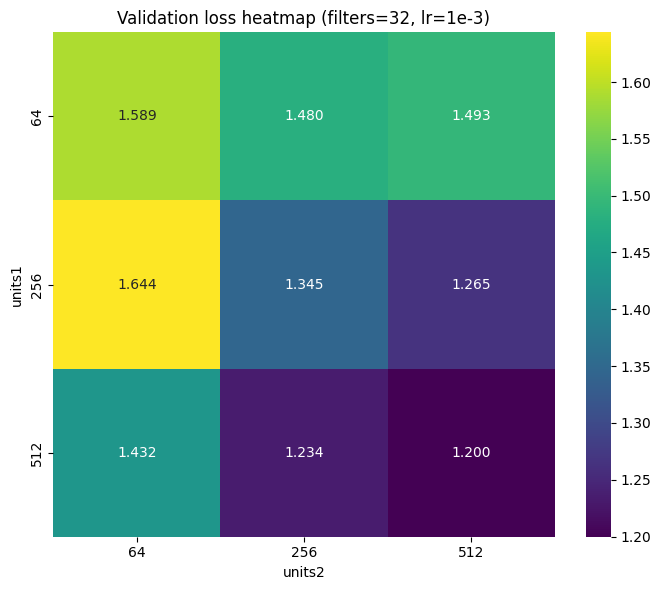

In [33]:
pivot_loss = df_exp.pivot(
    index="units1",
    columns="units2",
    values="loss_test"
)

plt.figure(figsize=(7, 6))
sns.heatmap(
    pivot_loss,
    annot=True,
    fmt=".3f",
    cmap="viridis",
)

plt.title("Validation loss heatmap (filters=32, lr=1e-3)")
plt.xlabel("units2")
plt.ylabel("units1")
plt.tight_layout()
plt.show()


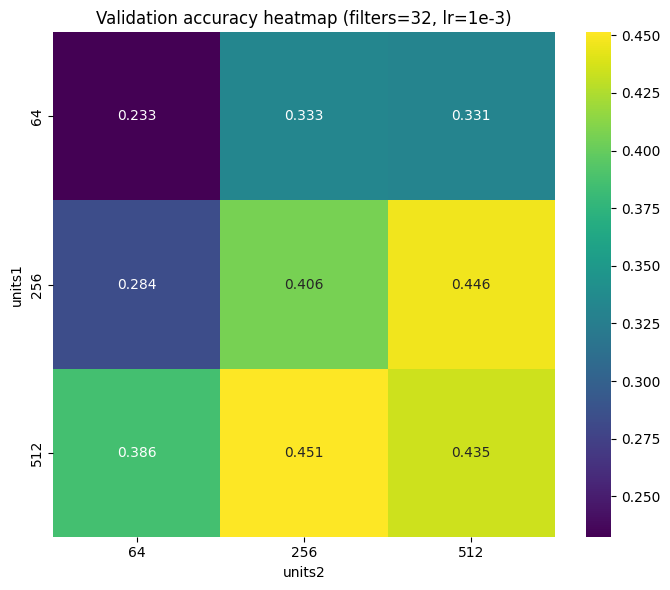

In [34]:
pivot_acc = df_exp.pivot(
    index="units1",
    columns="units2",
    values="accuracy"
)

plt.figure(figsize=(7, 6))
sns.heatmap(
    pivot_acc,
    annot=True,
    fmt=".3f",
    cmap="viridis",
)

plt.title("Validation accuracy heatmap (filters=32, lr=1e-3)")
plt.xlabel("units2")
plt.ylabel("units1")
plt.tight_layout()
plt.show()


In [35]:
df_exp.sort_values("loss_test").head(5)


,filters,units1,units2,lr,loss_test,loss_train,accuracy
0,32,512,512,0.001,1.199896,1.204283,0.43500
1,32,512,256,0.001,1.234224,1.305737,0.45125
3,32,256,512,0.001,1.264594,1.334163,0.44625
4,32,256,256,0.001,1.345314,1.433153,0.40625
2,32,512,64,0.001,1.432223,1.458668,0.38625


In [36]:
df_exp.sort_values("accuracy", ascending=False).head(5)


,filters,units1,units2,lr,loss_test,loss_train,accuracy
1,32,512,256,0.001,1.234224,1.305737,0.45125
3,32,256,512,0.001,1.264594,1.334163,0.44625
0,32,512,512,0.001,1.199896,1.204283,0.43500
4,32,256,256,0.001,1.345314,1.433153,0.40625
2,32,512,64,0.001,1.432223,1.458668,0.38625


In [37]:
df_exp["gap"] = df_exp["loss_train"] - df_exp["loss_test"]

df_exp.sort_values("gap", ascending=False)


,filters,units1,units2,lr,loss_test,loss_train,accuracy,gap
7,32,64,256,0.001,1.479525,1.568152,0.33250,0.088626
4,32,256,256,0.001,1.345314,1.433153,0.40625,0.087839
1,32,512,256,0.001,1.234224,1.305737,0.45125,0.071514
3,32,256,512,0.001,1.264594,1.334163,0.44625,0.069568
6,32,64,512,0.001,1.492918,1.523360,0.33125,0.030442
2,32,512,64,0.001,1.432223,1.458668,0.38625,0.026445
0,32,512,512,0.001,1.199896,1.204283,0.43500,0.004387
5,32,256,64,0.001,1.643703,1.618009,0.28375,-0.025693
8,32,64,64,0.001,1.589232,1.547436,0.23250,-0.041797


In [ ]:
summary = df_exp.groupby(["units1", "units2"]).agg(
    loss_test_mean=("loss_test", "mean"),
    acc_mean=("accuracy", "mean"),
).reset_index()

summary

,units1,units2,loss_test_mean,acc_mean
0,64,64,1.589232,0.23250
1,64,256,1.479525,0.33250
2,64,512,1.492918,0.33125
3,256,64,1.643703,0.28375
4,256,256,1.345314,0.40625
5,256,512,1.264594,0.44625
6,512,64,1.432223,0.38625
7,512,256,1.234224,0.45125
8,512,512,1.199896,0.43500


: 